> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigating the TMDB movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this Project i have chosen the TMDb movies dataset to analyze.
This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count..........etc.
Some of the question that this data can answer is :
1- which movie genre usually collects more revenue 
2- is there a clear correlation between specific acotrs and revenue?
3- are box office hits really affected by seasons?
4- which movie grossed the highest rating of all time ?
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [80]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')
# Stop floats from displaying as scientific notation
pd.options.display.float_format = '{:20,.2f}'.format

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [81]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# load the csv file 
tmdb_data = pd.read_csv('tmdb-movies.csv')
#printing first rows 
tmdb_data.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


In [82]:
tmdb_data.shape # i have used this to know the number of rows an columns in this data set 

(10866, 21)

In [83]:
tmdb_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

One of the obvious issues with the data is that many of the variables encompass multiple values. This makes it difficult for visualization and making inferences on the data as it stands. Namely, the 'cast', 'genres' and 'production_companies' variables are difficult to interpert as they are. One way to clean this is to isolate the different components in each cell by doing something like one hot encoding where each possible value is added as a column and a value of 0 or 1 is assigned to it whether it is present or not. While this allows for being able to use the data for inference, it makes the data sparse as many of the cells will have zero values while the dimensionality of the data is increased. This makes it important to choose any algorithms carefully by looking at which can handle high dimensions better than other while accomplishing the desired task succefully. There also seems to be data with missing values that can either be filled or dropped (will go with option 2).

In [84]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
print("Attributes: ",tmdb_data.columns)
print("All data: ", tmdb_data.shape)
# this is to drop missing values from the data
complete_data = tmdb_data.dropna()
print("Data with complete values: ",complete_data.shape)


Attributes:  Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')
All data:  (10866, 21)
Data with complete values:  (1992, 21)


In [85]:
# deleteing unwanted columns 
del_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj','tagline', 'homepage', 'keywords', 'overview', 'vote_count', 'vote_average']
tmdb_data= tmdb_data.drop(del_col,1)
#previewing the new dataset
tmdb_data.head()




,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015


In [86]:
#removing duplicates
tmdb_data.drop_duplicates(keep ='first', inplace=True)
rows, col = tmdb_data.shape

In [87]:
tmdb_data.shape #data after removing the duplicate rows

(10865, 10)

we here are getting rid of zero values in the revenue and budget colmuns 

In [88]:
# we want to get rid of zero values in the revenue nd budget columns of the dataset
check = ['budget', 'revenue']

#this will replace the value of '0' to NaN of columns given in the list
tmdb_data[check] = tmdb_data[check].replace(0, np.NaN)

#now we will drop any row which has NaN values in any of the column of the list (check_row) 
tmdb_data.dropna(subset = check, inplace = True)

rows, col = tmdb_data.shape
print(' we now have {} number of movies.'.format(rows-1))

 we now have 3853 number of movies.


After going through the data and cleaning it we are now left with 3853 movies from 10866 which was when we first started working with the data

Here i would like to change the format if the realese date to a standard date format 

In [89]:
tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])

In [90]:
tmdb_data.head(2)

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,"150,000,000.00","1,513,528,810.00",Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,"150,000,000.00","378,436,354.00",Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015


I would also like to change that data type of the budget and the revenue to integers to avoid any computational errors

In [91]:
change = ['budget', 'revenue']

tmdb_data[change] = tmdb_data[change].applymap(np.int64)
#shwoing the datatypes of all columns
tmdb_data.dtypes

budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 1- which movie collected the most profit ?
To answer this Question i want  look into the all profits of the movies To achive that we will be calculating the profit for each movie by this eqation Profit = revenue - budget

#### Note : since no currency is stated  we assume that the data is in US dollars

In [99]:
# Knowing that profit is revenue - budget
tmdb_data.insert(2, 'profit', tmdb_data['revenue'] - tmdb_data['budget'])
tmdb_data['profit'] = tmdb_data['profit'].apply(np.int64)



ValueError: cannot insert profit, already exists

In [100]:
#showing the dataset
tmdb_data.head()

,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015


#### As you can see we have calculated the profits for the movies and included it as a new column in the dataset

In [94]:
tmdb_data.dtypes # check the data types of the values

budget                           int64
revenue                          int64
profit                           int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
dtype: object

 #### Now we can contiue by getting the highest profit

In [98]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#function which will take any column as argument from and keep its track 
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= tmdb_data[column].idxmax()
    high_details=pd.DataFrame(tmdb_data.loc[high])
    
    #for lowest earned profit
    low= tmdb_data[column].idxmin()
    low_details=pd.DataFrame(tmdb_data.loc[low])
    
    #collectin data in one place
    Movieinfo=pd.concat([high_details, low_details], axis=1)
    
    return Movieinfo

#calling the function
calculate('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


### Answer :
#### After getting the max and min values of the profits we can clearly see that they are drastically diffrent in the success of the two movies . Avatar collected the highest profits in the data set which was equal to 2544505847  while The warrior's day Way had a  -413912431 profit.

### 2- which movie genres are most likely to be succesful

In [103]:
def data(column):
    #will take a column, and separate the string by '|'
    data = tmdb_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count # counting the number of movies for each genre

In [104]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Drama        1756
Comedy       1358
Thriller     1204
Action       1085
Adventure     749
dtype: int64

#### The genres we got are for all movies in the dataset but since we are looking for the succesfull genres we have to use the movies with considerably high profits to contiune the computatons , so here i am going to use movies with more than  30 million in profits to compare

In [113]:
profit_data = tmdb_data[tmdb_data['profit'] >= 30000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head()

,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
4,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
5,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015


In [114]:
profit_data.shape

(1672, 11)

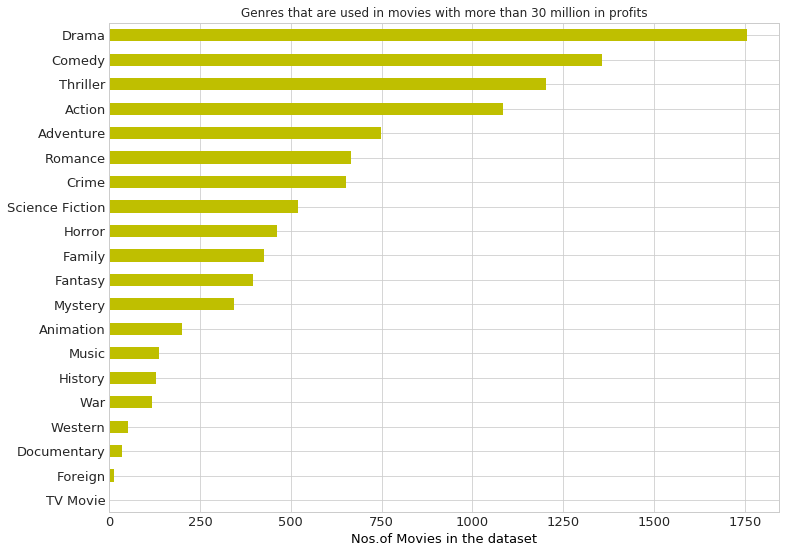

In [116]:
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = 'y', fontsize = 13,grid =True)

#title
lt.set(title = 'Genres that are used in movies with more than 30 million in profits')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

### Answer :
#### After we have plotted the movies with more than 30 million in profts we could clearly see that most of the movies Fell under the drama genre 

### 2- Are box office hits really affected by seasons?
#### since we want to see the correlation between having a hit and what season (month) it is realased in i will be using the succesful movie data like i had done ubove 

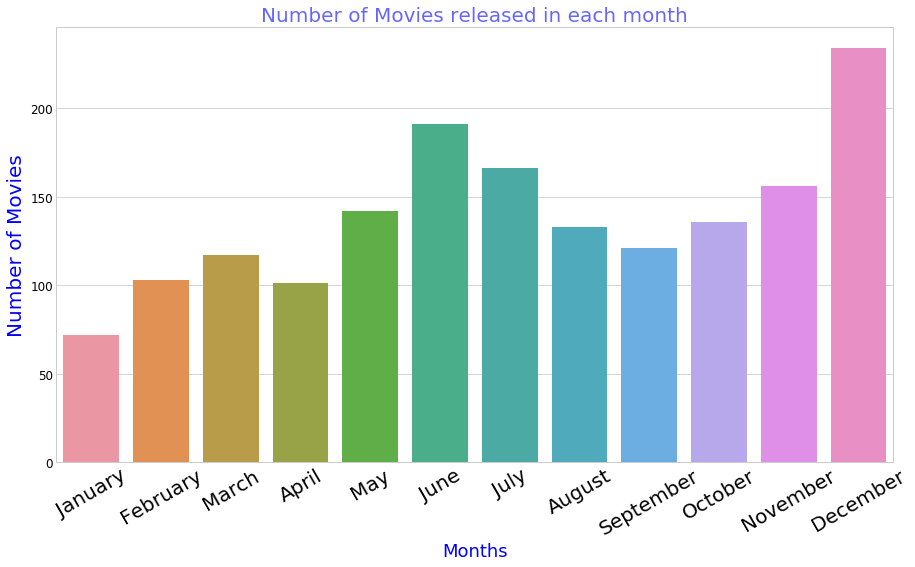

In [121]:
#for answering this question we need to group all of the months of years and then compre the performance of the relase dates
index_release_date =profit_data.set_index('release_date')
#Here we aregroupong the data by month
groupby_index = index_release_date.groupby([(index_release_date.index.month)])
#this will give us how many movies are released in each month
monthly_movie_count = groupby_index['profit'].count()

#converting table to a dataframe
monthly_movie_count= pd.DataFrame(monthly_movie_count)
#Giving the list for all the possible months
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_movie_count_bar = sns.barplot(x = monthly_movie_count.index, y = monthly_movie_count['profit'], data = monthly_movie_count)
monthly_movie_count_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_movie_count_bar.axes.set_title('Number of Movies released in each month', color="b", fontsize = 20, alpha = 0.6)

#setting x-label
monthly_movie_count_bar.set_xlabel("Months", color="b", fontsize = 18)
#setting y-label
monthly_movie_count_bar.set_ylabel("Number of Movies", color="b", fontsize = 20)

#customizing axes values
monthly_movie_count_bar.tick_params(labelsize = 12, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_movie_count_bar.set_xticklabels(month_list, rotation = 30, size = 20)

#shows the plot
plt.show()


#### This  is interesting, the plot shows that from the 30 million + profitbale movies more than 200 of them were realesed in december

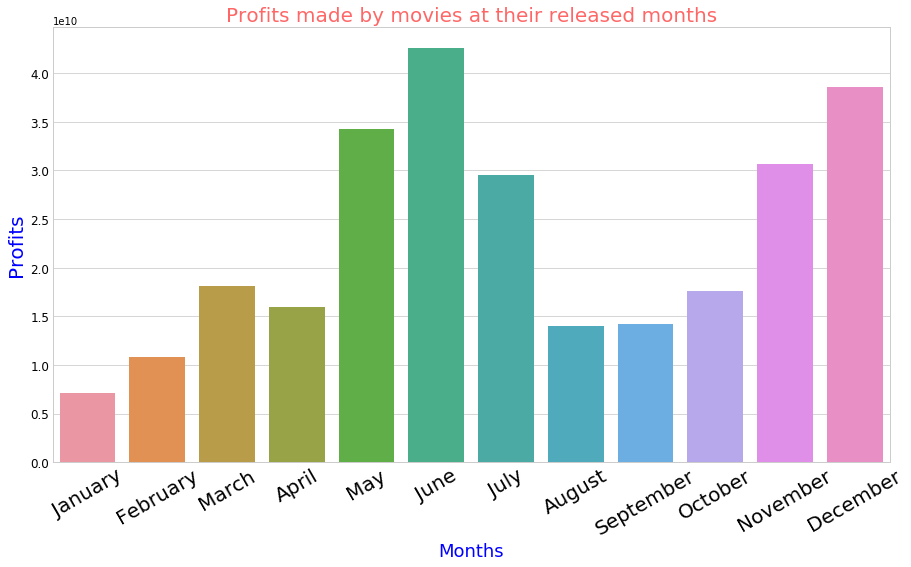

In [123]:
monthly_profit = groupby_index['profit'].sum()

#converting table to a dataframe
monthly_profit = pd.DataFrame(monthly_profit)

#giving seaborn bar plot to visualize the data
#giving values to our graph
monthly_profit_bar = sns.barplot(x = monthly_profit.index, y = monthly_profit['profit'], data = monthly_profit)

#setting size of the graph
monthly_profit_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_profit_bar.axes.set_title('Profits made by movies at their released months', color="r", fontsize = 20, alpha = 0.6)

#setting x-label
monthly_profit_bar.set_xlabel("Months", color="b", fontsize = 18)
#setting y-label
monthly_profit_bar.set_ylabel("Profits", color="b", fontsize = 20)

#customizing axes values
monthly_profit_bar.tick_params(labelsize = 12, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_profit_bar.set_xticklabels(month_list, rotation = 30, size = 20)

#shows the plot
plt.show()

### Answer :
#### After plotting the data we clearly see that the most profits per month were in June, I would assume that it's because june is a summer month month and people tend to go to the movies with family memebers the most when they are in a holiday.

### 3- which director has the most movies Succesful movies (30+ in profits) ?

In [128]:
def extract_data(column_name):
    #will take a column, and separate the string by '|'
    all_data = profit_data[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    #this will us value in descending order
    count = all_data.value_counts(ascending = False)
    
    return count

In [129]:
director_count = extract_data('director')
#shwoing top 5 values
director_count.head()

Steven Spielberg    25
Clint Eastwood      15
Tim Burton          15
Robert Zemeckis     13
Ridley Scott        12
dtype: int64

### Answer :
#### It seems that the Steven Speilberg made the most profatbile movies in the dataset with 25 movies earing more the 30 million in profits

### 4- whats the average runtime for Succesful movies (30+ in profits) ?

In [134]:
def avg(column):
    return profit_data[column].mean()
avg('runtime')

112.75299043062201

The Averege Runtime is 112, lets invistagte this some more with a graph to see if there are any outliers

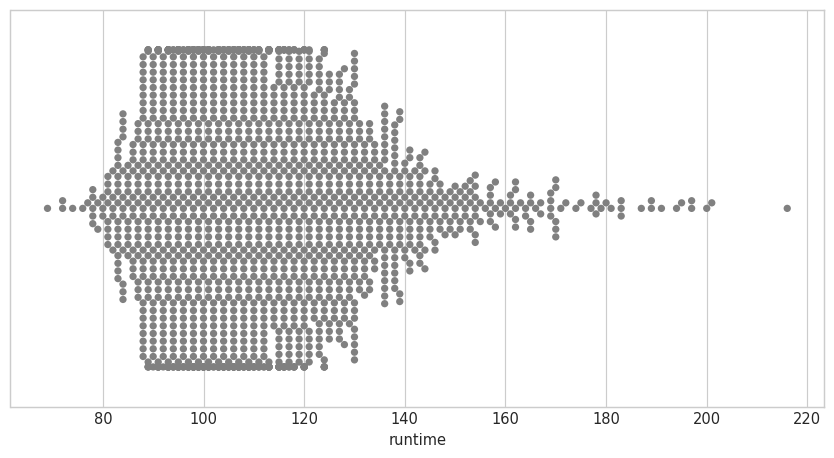

count               1,672.00
mean                  112.75
std                    20.51
min                    69.00
25%                    98.00
50%                   109.00
75%                   124.00
max                   216.00
Name: runtime, dtype: float64

In [138]:
plt.figure(figsize=(10,5), dpi = 105)
#using seaborn to generate the plot
sns.swarmplot(profit_data['runtime'], color = 'grey')
#displaying the plot
plt.show()
profit_data['runtime'].describe()

### Answer :
#### By looking at both the plot and discreption of the plot,
25% of movies have a runtime of less than 98 minutes
50% of movies have a runtime of less than 109 minutes. (median)
75% of movies have a runtime of less than 124 minutes

<a id='conclusions'></a>
## Conclusions

#### After analyzing the data , I have noticed  a combination that would increase the chances for amovie to earn 30million in profts or more, By choosing steven spielber as the director  with drama as the genre and realsing it in the month of june,  and finally having a runtime of 112 minutes

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [139]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0